In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [ ]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    #Standart deviation of the trips duration in January
    print('Standart deviation: ', df.duration.std())
    
    # Fraction of the records between 1 and 60 minutes
    print('Fraction: ', ((df.duration >= 1) & (df.duration <= 60)).mean())
    
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    return df

In [6]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

Standart deviation:  10.604646619926417
Fraction:  1.0
Standart deviation:  10.06422721663908
Fraction:  1.0


In [5]:
categorical = ['PULocationID','DOLocationID']
df_train[categorical] = df_train[categorical].astype(str)

categorical = ['PULocationID','DOLocationID']
df_val[categorical] = df_val[categorical].astype(str)

In [6]:
dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

print('Dimensionality: ', X_train.shape)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

Dimensionality:  (3009173, 515)


In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)

print('RMSE on train: ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE on val: ', mean_squared_error(y_val, y_pred_val, squared=False))

RMSE on train:  7.649261027792376
RMSE on val:  7.811832836304415


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


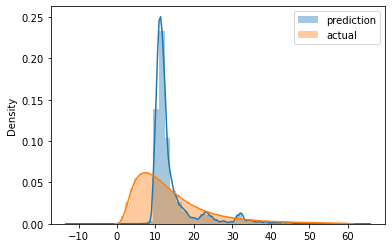

In [8]:
sns.distplot(y_pred_train, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


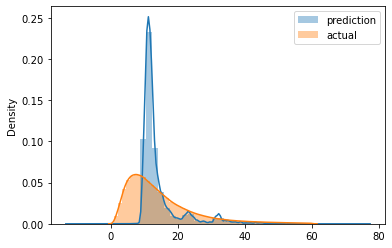

In [9]:
sns.distplot(y_pred_val, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()